In [48]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import logging
logging.basicConfig(filename='logging.log', filemode='a',level=logging.INFO)

to_d = datetime.datetime.today()
from_d = to_d - datetime.timedelta(10)

class stock(pd.Series):

    @property
    def max_price(self): return self.max()
        
    @property
    def _constructor(self):
        return stock
    
    @property
    def _constructor_expanddim(self):
        return Stocks
    
class Stocks(pd.DataFrame):
    
    @property
    def max_date(self): return self.index.max()
    
    @property
    def last_price(self): return self.tail(1)

    @property
    def _constructor(self):
        return Stocks
    @property
    def _constructor_sliced(self):
        return stock

    #defining methods
    def date_filter(self,startdate = from_d , enddate = to_d):
        '''This function filters the date of the stock dataframe'''
        return self[(self.index >= from_d) & (self.index <= to_d)]
    
    def dateframe(self,dateframe = 'd'):
        '''this function aggregate the stocks datas on weekly,monthly..etc. and shows last value'''
        return self.groupby(self.index.to_period(dateframe)).tail(1).to_period(dateframe)

In [23]:
def get_data(stocks):
    df = pd.DataFrame()
    for i in stocks:
        data = pdr.get_data_yahoo(i)
        data['name']  = i
        data = data[['Close','name']]
        df = df.append(data)
    df = df.pivot(columns='name')
    df.columns = [i[1] for i in df.columns]
    return Stocks(df)

In [31]:
stocks = get_data(['NIO','AAPL'])

In [32]:
stocks

,AAPL,NIO
Date,,
2016-02-23,23.672501,NaN
2016-02-24,24.025000,NaN
2016-02-25,24.190001,NaN
2016-02-26,24.227501,NaN
2016-02-29,24.172501,NaN
...,...,...
2021-02-12,135.369995,59.849998
2021-02-16,133.190002,59.230000
2021-02-17,130.839996,57.320000


In [37]:
stocks.date_filter(startdate = from_d).dateframe('d').AAPL.max_price

135.3699951171875

In [77]:
stocksp.ASAN.max_price

41.4900016784668

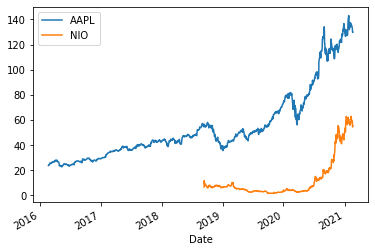

In [40]:
stocks.plot();

In [41]:
stocksp.dateframe('d').pct_change().describe()

,AAPL,NIO
count,1257.000000,613.000000
mean,0.001534,0.005684
std,0.018915,0.070315
min,-0.128647,-0.211614
25%,-0.005993,-0.031294
50%,0.001001,-0.001335
75%,0.010109,0.032941
max,0.119808,0.757576


In [43]:
stocksp.dateframe('d').pct_change().describe()

,AAPL,NIO
count,1257.000000,613.000000
mean,0.001534,0.005684
std,0.018915,0.070315
min,-0.128647,-0.211614
25%,-0.005993,-0.031294
50%,0.001001,-0.001335
75%,0.010109,0.032941
max,0.119808,0.757576


<AxesSubplot:xlabel='Date'>

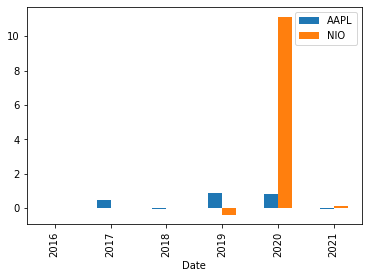

In [47]:
stocksp.dateframe('y').pct_change().plot(kind='bar')

In [45]:
stocksp.corr()

,AAPL,NIO
AAPL,1.000000,0.805143
NIO,0.805143,1.000000


In [ ]:
def date_filter(df,startdate = from_d):
    '''This function filters the date of the stock dataframe'''
    return df[df.index > from_d]


In [332]:
df.pipe(date_filter)

,Close,name
Date,,
2021-02-10,39.730000,ASAN
2021-02-11,38.750000,ASAN
2021-02-12,41.490002,ASAN
2021-02-16,40.980000,ASAN
2021-02-17,40.200001,ASAN
2021-02-18,40.480000,ASAN
2021-02-19,42.910000,ASAN
